In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [5]:
tr=pd.read_csv(r'C:\Users\DELLS\OneDrive\Documents\Downloads\spam.csv',encoding = "ISO-8859-1")

In [6]:
tr.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
tr.shape

(5572, 5)

In [8]:
tr.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
tr.rename(columns={'v1':'target','v2':'text'},inplace=True)
tr.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2574,spam,Your next amazing xxx PICSFREE1 video will be ...,NaN,NaN,NaN
2538,ham,The monthly amount is not that terrible and yo...,NaN,NaN,NaN
2254,ham,Ok. Me watching tv too.,NaN,NaN,NaN
1082,ham,Send to someone else :-),NaN,NaN,NaN
4447,ham,I sent them. Do you like?,NaN,NaN,NaN


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
tr['target']=encoder.fit_transform(tr['target'])

In [13]:
tr.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
tr.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [15]:
kchra=tr.duplicated().sum()
kchra

403

In [16]:

tr = tr.drop_duplicates(keep='first')

In [17]:
tr.duplicated().sum()

0

In [18]:
tr.shape

(5169, 5)

In [19]:
##EDA

In [20]:
tr['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

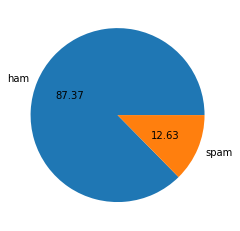

In [21]:
plt.pie(tr['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
!pip install nltk


In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
tr['num_characters'] = tr['text'].apply(len)

In [26]:
tr.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [27]:
tr['num_sentence']=tr['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
tr

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,161,4
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57,2
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125,1


In [29]:
tr['num_words']=tr['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
tr

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentence,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,15
...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,161,4,35
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57,2,15
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125,1,27


In [31]:
tr[['num_words','num_sentence','num_characters']].describe()

,num_words,num_sentence,num_characters
count,5169.000000,5169.000000,5169.000000
mean,18.453279,1.947185,78.977945
std,13.324793,1.362406,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,28.000000,910.000000


In [32]:
tr[tr['target']==0][['num_words','num_sentence','num_characters']].describe()

,num_words,num_sentence,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.120903,1.799601,70.459256
std,13.493725,1.278465,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,28.000000,910.000000


In [33]:
tr[tr['target']==1][['num_words','num_sentence','num_characters']].describe()

,num_words,num_sentence,num_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.967841,137.891271
std,7.008418,1.483201,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,8.000000,224.000000


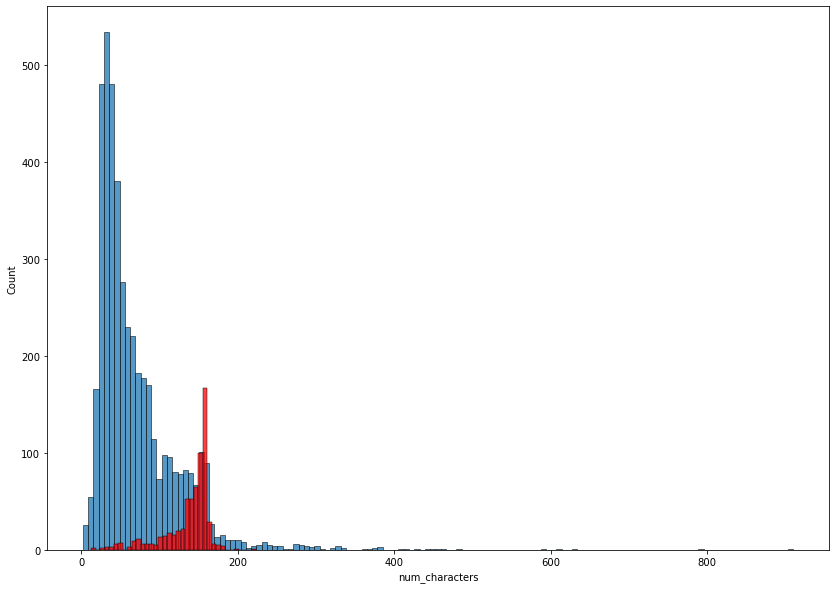

In [34]:
plt.figure(figsize=(14,10))
sns.histplot(tr[tr['target']==0]['num_characters'])
sns.histplot(tr[tr['target']==1]['num_characters'],color='red')
plt.show()

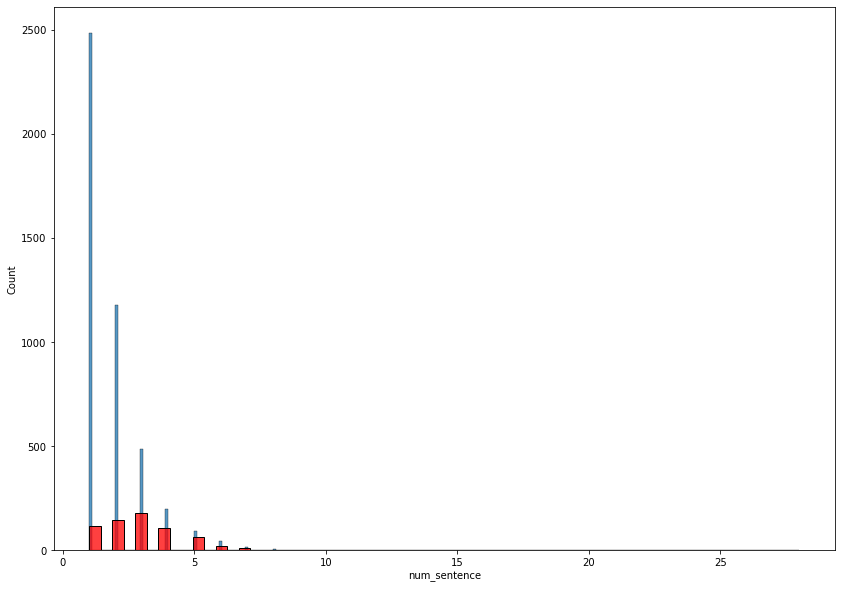

In [35]:
plt.figure(figsize=(14,10))
sns.histplot(tr[tr['target']==0]['num_sentence'])
sns.histplot(tr[tr['target']==1]['num_sentence'],color='red')
plt.show()

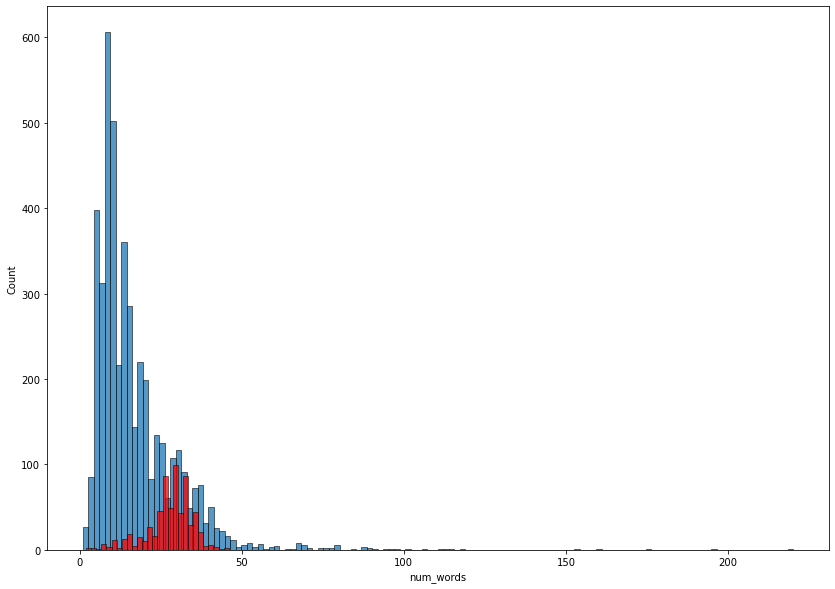

In [36]:
plt.figure(figsize=(14,10))
sns.histplot(tr[tr['target']==0]['num_words'])
sns.histplot(tr[tr['target']==1]['num_words'],color='red')
plt.show()

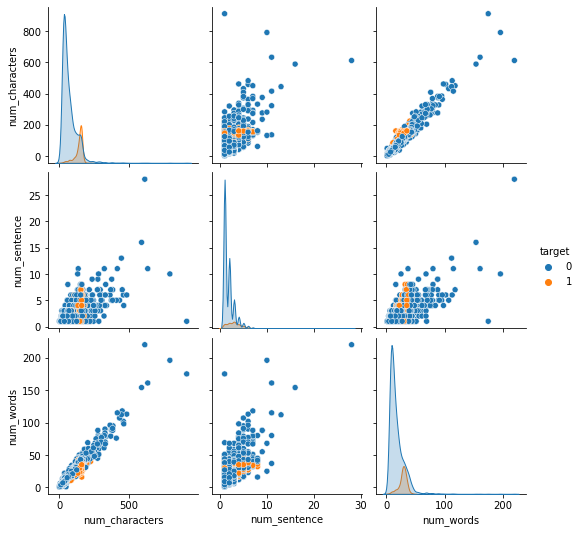

In [37]:
sns.pairplot(tr,hue='target')

Correlation = 1 is perfect correlation 
0 is no correlation 
-1 is  a perfect correlation 

In [38]:
t=tr.corr()
t

,target,num_characters,num_sentence,num_words
target,1.000000,0.384717,0.284901,0.262984
num_characters,0.384717,1.000000,0.638143,0.965770
num_sentence,0.284901,0.638143,1.000000,0.684541
num_words,0.262984,0.965770,0.684541,1.000000


<AxesSubplot:>

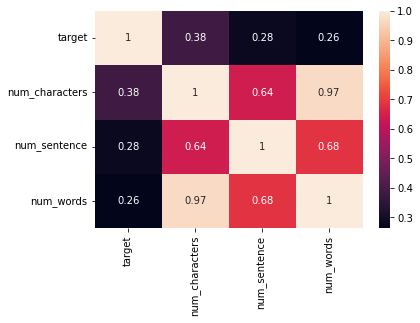

In [39]:
sns.heatmap(t,annot=True)

1.Lower case
2.Remove tokenization 
3.Remove special character
4.Remove stopwords and puncation 
5.stemming  


In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            text=y[:]
            y.clear()
            for i in text:
              y.append(ps.stem(i))
    return " ".join(y)

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text('Hi,How are you aadit??. I am fine. what about you?looking')

In [45]:
transform_text

<function __main__.transform_text(text)>

In [46]:
tr.drop(columns=['text'])

,target,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentence,num_words
0,0,NaN,NaN,NaN,111,2,24
1,0,NaN,NaN,NaN,29,2,8
2,1,NaN,NaN,NaN,155,2,37
3,0,NaN,NaN,NaN,49,1,13
4,0,NaN,NaN,NaN,61,1,15
...,...,...,...,...,...,...,...
5567,1,NaN,NaN,NaN,161,4,35
5568,0,NaN,NaN,NaN,37,1,9
5569,0,NaN,NaN,NaN,57,2,15
5570,0,NaN,NaN,NaN,125,1,27


In [47]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [48]:
tr['text'][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [49]:
transform_text('SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info')

'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info'

In [50]:
tr['transform_text']=tr['text'].apply(transform_text)

In [51]:
tr.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentence,num_words,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,15,nah think goe usf live around though


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
spam_wc=wc.generate(tr[tr['target']==1]['transform_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(13,8))
plt.imshow(spam_wc)

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='yellow')

ham_wc=wc.generate(tr[tr['target']==0]['transform_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(19,8))
plt.imshow(ham_wc)

In [ ]:
tr.head()

In [ ]:
spam_corpus=[]
for msg in tr[tr['target']==1]['transform_text'].tolist():
  for word in msg.split(" "):
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in tr[tr['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)


In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
tr.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
#X=cv.fit_transform(tr['transform_text']).toarray()
X= tfidf.fit_transform(tr['transform_text']).toarray()

In [ ]:
X.shape

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#kj = scaler.fit_transform(X)

In [ ]:
y=tr['target'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [ ]:
temp_df

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [ ]:
temp_df

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [ ]:
voting.fit(X_train,y_train)


In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier


In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('hello.pkl','wb'))